
# Project: Investigate a Dataset (IMDB Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We have a dataset with imdb movies list from 1960 to 2015

> we are going to do some analysis on this data , we are trying to know some basic insights such as:
> which movie is top_rated and which is the best!, the movie with highest run time, the director with highest number of movies, the production company involved in most of the movies,etc.


> we are going to find a relation between the release year of movies and the revenue of each with a reference to 2010 U.S Dollars (revenue_adj) to take inflation into consideration and make it a fair comparison.

In [1]:
# importing libraries we might use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties and assessing data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# get the shape of data
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

we notice there are so many columns that would not be of so much help in our analysis so we are dropping them later in cleaning section

In [5]:
#get some basic info about data types and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Since null values are in columns we won't correlate to other columns in our analysis ,we won't drop them not to lose other valuable data we could get valuable insights from later on.


### Data Cleaning and fixing issues found in assessment

In [6]:
#dropping un-neccessary columns to our analysis 
df.drop(columns=['id','imdb_id','popularity','budget','revenue','cast','homepage','tagline','overview','genres','keywords','release_date'],inplace=True)
df.head()

,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#check for duplicate rows
np.sum(df.duplicated())

1

In [8]:
#dropping the one duplicate row found
df.drop_duplicates(inplace=True)
#check the shape of cleaned data set now
df.shape

(10865, 9)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (which movie is top_rated or the "best")

In [9]:
df[df.vote_average==df.vote_average.max()]

,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,The Story of Film: An Odyssey,Mark Cousins,900,NaN,14,9.2,2011,0.0,0.0


The Story of Film: An Odyssey seems to be the top-rated movie with a vote_average of 9.2 ,but we notic that the vote_count is 14 which seems to be low to judge it's the best.

so let's check this further..

In [10]:
df.vote_count.describe()

count    10865.000000
mean       217.399632
std        575.644627
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

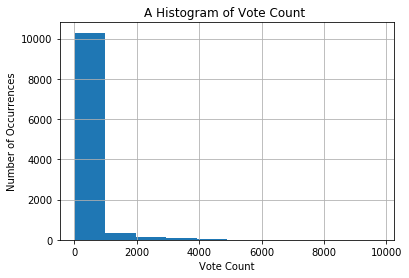

In [11]:
df.vote_count.hist()
plt.xlabel('Vote Count')
plt.ylabel('Number of Occurrences')
plt.title('A Histogram of Vote Count ')
plt.grid(True)
plt.show()

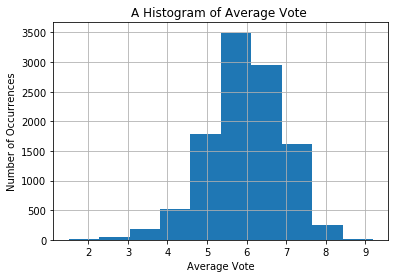

In [12]:
df.vote_average.hist()
plt.xlabel('Average Vote')
plt.ylabel('Number of Occurrences')
plt.title('A Histogram of Average Vote ')
plt.grid(True)
plt.show()

In [13]:
df.vote_average.describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

we notice that 14 vote counts is a so low to judge a movie , so we try to find th top rated movie whilst the vote counts is greater than the mean vote count which is around 217 counts, so let's explore...

In [14]:
# querrying the range of data set more than mean vote_count
new_df=df.query('vote_count>vote_count.mean()')
new_df

,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
5,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08
6,Terminator Genisys,Alan Taylor,125,Paramount Pictures|Skydance Productions,2598,5.8,2015,1.425999e+08,4.053551e+08
7,The Martian,Ridley Scott,141,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08
8,Minions,Kyle Balda|Pierre Coffin,91,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09
9,Inside Out,Pete Docter,94,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015,1.609999e+08,7.854116e+08


In [15]:
#getting the best movie in the new dataset
new_df[new_df.vote_average==new_df.vote_average.max()]

,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
4178,The Shawshank Redemption,Frank Darabont,142,Castle Rock Entertainment,5754,8.4,1994,3.677779e+07,4.169346e+07


We get 'The Shawshank Redemption' movie with a vote_average of 8.4 and vote_count of 5754 which in my opinion is the best in those terms rather than the earlier one with so much low vote counts. 

### Research Question 2  (the movie with the highest run time)

In [16]:
df[df.runtime==df.runtime.max()]

,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,The Story of Film: An Odyssey,Mark Cousins,900,NaN,14,9.2,2011,0.0,0.0


It's The Story of Film: An Odyssey again with a 900 minutes, which seems so long!
so let's explore this a little more...

In [17]:
df.runtime.describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

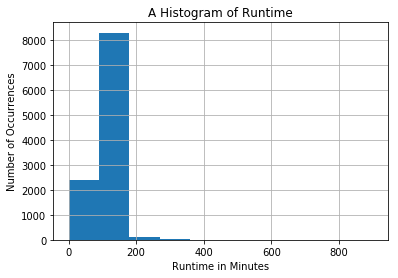

In [18]:
df.runtime.hist()
plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Occurrences')
plt.title('A Histogram of Runtime')
plt.grid(True)
plt.show()

Based on the above stats it do seems an outlier..!

Searching for it online in the imdb website, I found that it's categorized as a TV_mini series which do make sense.


### Research Question 3  (the director with the highest number of movies)

In [19]:
df.director.value_counts().head()

Woody Allen         45
Clint Eastwood      34
Martin Scorsese     29
Steven Spielberg    29
Ridley Scott        23
Name: director, dtype: int64

Apparently it's Woody Allen with 45 movies directed alone!

### Research Question 4  (the production company involved in most of the movies and if it made the highest revenues)

In [20]:
df.production_companies.value_counts().head()

Paramount Pictures           156
Universal Pictures           133
Warner Bros.                  84
Walt Disney Pictures          76
Metro-Goldwyn-Mayer (MGM)     72
Name: production_companies, dtype: int64

Obviously it's Paramount Pictures which  involved in most of the movies, but did it make the most revenues?

let's figure this out...

In [21]:
# We querry for its revenue sum
# using int to return an integer number instead of float which is sensitive in comparison
Paramount_Pictures=df.query('production_companies=="Paramount Pictures"')
revenue_sum=int(Paramount_Pictures.revenue_adj.sum())
revenue_sum

14597352146

In [22]:
# compare its revenue sum with the maximum sum to make sure it is the highest if True
max_sum=int(df.groupby('production_companies').revenue_adj.sum().max())
max_sum==revenue_sum

True

Paramount Pictures made the highest revenues (14.597352146 billion U.S dollars) and the highest number of movies as well (156 movies)

### Research Question 5 ( What's the relation between the release year of movies and the mean revenue of each)
#### Dependence 
with a reference to 2010 U.S Dollars (revenue_adj) to take inflation into consideration and make it a fair comparison.)

In [23]:
#exploring revenue
df.revenue_adj.describe()

count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [24]:
df[df.revenue_adj==0].shape

(6016, 9)

It appears that 6016 rows out of 10865 has 0 U.S dollars revenue which does not make sense.

To compare the revenues with release years we will only consider the other rows with a real revenue..

In [25]:
# we extract the new dataframe
df_new=df[df.revenue_adj>0]
df_new.shape

(4849, 9)

In [26]:
# we group the data by release year and get the mean revenue for each year
df_new.groupby('release_year').revenue_adj.mean()

release_year
1960    1.527310e+08
1961    2.463622e+08
1962    1.726663e+08
1963    1.906224e+08
1964    2.996491e+08
1965    6.340369e+08
1966    1.138525e+08
1967    3.445036e+08
1968    1.383001e+08
1969    2.900291e+08
1970    2.420318e+08
1971    1.557516e+08
1972    2.579801e+08
1973    3.535980e+08
1974    2.113695e+08
1975    2.586385e+08
1976    1.918257e+08
1977    3.268859e+08
1978    1.907818e+08
1979    1.874836e+08
1980    1.199986e+08
1981    1.063961e+08
1982    1.388801e+08
1983    9.715195e+07
1984    1.043788e+08
1985    8.700997e+07
1986    7.860193e+07
1987    9.227858e+07
1988    8.512746e+07
1989    1.179873e+08
1990    1.152010e+08
1991    1.076529e+08
1992    1.151902e+08
1993    9.720918e+07
1994    1.199789e+08
1995    1.310242e+08
1996    1.111036e+08
1997    1.352769e+08
1998    1.198017e+08
1999    1.259765e+08
2000    1.252454e+08
2001    1.290184e+08
2002    1.277115e+08
2003    1.290947e+08
2004    1.182168e+08
2005    1.002288e+08
2006    8.546100e+07


In [27]:
# saving the previous series to a vaiable (a) for easy calling it for plotting
a=df_new.groupby('release_year').revenue_adj.mean()

In [28]:
# obtain the highest average revenue
a.max()

634036929.51198053

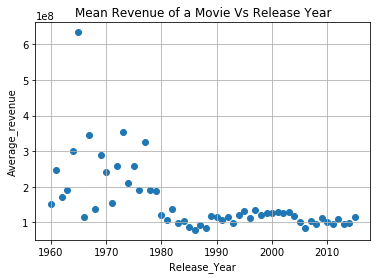

In [29]:
plt.scatter(a.index,a)
plt.xlabel('Release_Year')
plt.ylabel('Average_revenue')
plt.title('Mean Revenue of a Movie Vs Release Year')
plt.grid(True)
plt.show()

From the scatter plot we see that very old movies from year 1960 to 1980 had more average movie revenue than from 1980 to 2015 , in which average movie revenue was a little more or less than 100 million dollars.

We also see that the highest average movie revenue was in 1965 with around 634 million dollars!

<a id='conclusions'></a>
## Conclusions

#### After doing some basic analysis on the dataset I found the following:

> **Limitation**: One serious limitation was the zero values of revenues which was about more than half of the data, so to work around this limitation we dropped these values so that we get real insights on the average revenue for each year of release.

> **1**: 'The Shawshank Redemption' movie with a vote_average of 8.4 and vote_count of 5754 which in my opinion is the best in the terms of both vote_average and vote_count

> **2**: The Story of Film: An Odyssey which is a 900 minutes long _ seems so long!_ turned out to be a TV_mini series which makes sense!

> **3**:  Woody Allen with 45 movies directed alone is the director with highest number of movies.

> **4**: Paramount Pictures made the highest revenues (14.597352146 billion U.S dollars) and the highest number of movies as well (156 movies) 

> **5**: Very old movies from year 1960 to 1980 had more average movie revenue than from 1980 to 2015 , in which average movie revenue was a little more or less than 100 million dollars. The highest average movie revenue was in 1965 with around 634 million dollars!

